In [5]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

In [42]:
query = "Ryan Reaves"
# data collected after Ryan Reaves illegal hit to head to Darnell Nurse
# https://bsky.app/profile/tictactomar.bsky.social/post/3lb4alxl22k26

In [37]:
df = pd.read_csv('/content/sample_data/bluesky_posts_ryan-reaves.csv')
df.head()

,Content
0,That will be the last we see of Ryan Reaves fo...
1,We’ll see if this app can survive The Great Ry...
2,"also, just to make sure it's clear \n\nthat's ..."
3,UPDATE: Ryan Reaves got 5 games for that hit
4,Ryan Reaves is out of the game for this hit on...


In [29]:
nltk_result = {}
for i, row in df.iterrows():
    text = row['Content']
    sentiment = sia.polarity_scores(text)
    nltk_result[i] = sentiment


In [36]:
nltk_df = pd.DataFrame(nltk_result).T
nltk_df = pd.merge(df, nltk_df, left_index=True, right_index=True)
nltk_df.tail()

,Content,neg,neu,pos,compound
20,darnell nurse is shaken up and bloody after ry...,0.323,0.623,0.054,-0.7845
21,I don’t think that Ryan Reaves should be suspe...,0.307,0.693,0.000,-0.4767
22,Nick Robertson out of the lineup because you a...,0.000,0.877,0.123,0.3947
23,Ryan Reaves suspended 5 games for his illegal ...,0.358,0.642,0.000,-0.7717
24,Ryan Reaves has been suspended 5 games for his...,0.233,0.767,0.000,-0.7717


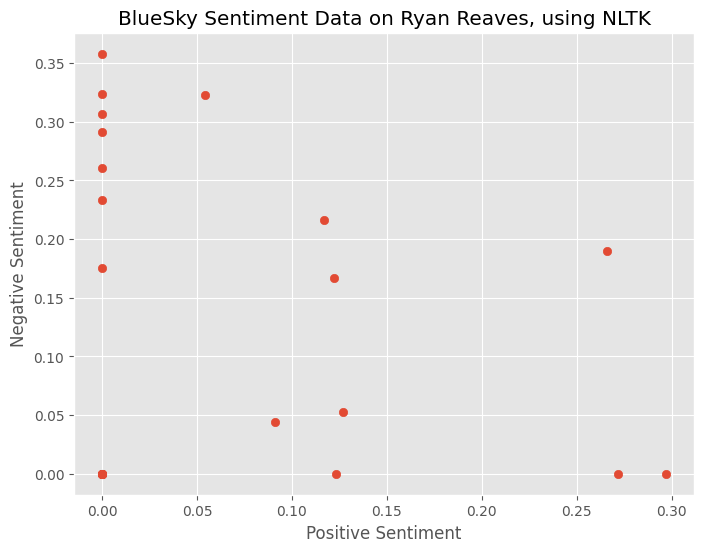

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(nltk_df['pos'], nltk_df['neg'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')
plt.title(f'BlueSky Sentiment Data on {query}, using NLTK')
plt.show()